In [1]:
# Local imports
import argparse
import os
import sys
import time
import glob
import re

# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps-differences')
import dictionaries as dic
import functions as fnc
import plotting_functions as plt_fnc

In [24]:
# Set up the parameters for the run
variable = 'psl'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'psl'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# exclude EC-Earth3 as time period not long enough
historical_models = dic.psl_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.models

In [3]:
# Now process the observations for this run
# for year 2-9 DJFM global
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [4]:
# Load the historical data
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loading v

In [5]:
# Load the dcpp data
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [6]:
type(historical_data)

dict

In [7]:
type(dcpp_data)

dict

In [8]:
# # TODO: test the p-value bootstrapping function
# # only do 50 bootstraps for our testcase
# pfield_bs = fnc.calculate_spatial_correlations_bootstrap(obs, dcpp_data, dcpp_models, variable='psl', n_bootstraps=50)

In [9]:
# type(pfield_bs)


# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs)
# below_threshold = np.count_nonzero(pfield_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [10]:
# import numpy as np

# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs)
# below_threshold = np.count_nonzero(pfield_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

In [11]:
# # Now test this for the historical data
# # only do 50 bootstraps for our testcase
# pfield_bs_hist = fnc.calculate_spatial_correlations_bootstrap(obs, historical_data, historical_models, variable='psl', n_bootstraps=50)

In [12]:
# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs_hist)
# below_threshold = np.count_nonzero(pfield_bs_hist < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [13]:
# # test the function for calculated the bootstrapped p-values
# # for the differences between the historical and dcpp data
# # only do 50 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data, 
                                                                    dcpp_models, historical_models, 
                                                                        variable='psl', n_bootstraps=1000)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2020 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 199

In [14]:
# # Count how many values are less than 0.05
# total_values = np.size(pfield_diff_bs)
# below_threshold = np.count_nonzero(pfield_diff_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [15]:
# # Now calculate the spatial correlations differences
# # between the dcpp and historical data
# # using the function calculate_spatial_correlations_diff
# # NOTE: watch out for dodgy output from this function
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (178, 54, 72, 144)
shape of observed data (54, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
converting observed d

In [16]:
# # Just as a test, plot the correlation coefficients for each of the uninit vs init as subplots
# # TODO: plot the subplots for correlation differences
# # TODO: Add a subplot to this which shows the difference between the two
# plt_fnc.plot_correlations_init_vs_uninit(obs, dcpp_data, historical_data, 
#                                             dcpp_models, historical_models, variable,
#                                                 region, season, forecast_range, dic.plots_dir,
#                                                     dic.azores_grid, dic.iceland_grid, dic.uk_n_box, 
#                                                         dic.uk_s_box)


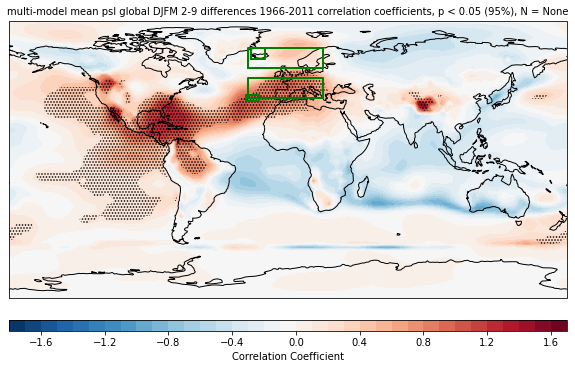

In [17]:
# TODO: plot the mult-model differences in spatial correlations
# BUG: Figure out where the holes are coming from in the data
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [2]:
# Set up the parameters for the individual 850 winds run
# the 850 winds will be calculated from the u and v components of the wind
variable = 'wind'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs_ua_va
obs_var_name = 'wind'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# NOTE: EC-Earth3 is not included as it is not valid for va
historical_models = dic.historical_models_ua_va_noEC
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models

In [3]:
# Process the observations for the u and v components
model_ws_variables = ['ua', 'va']
obs_ws_variables = ['var131', 'var132']

# Process the observations for the u and v components
obs_u = fnc.process_observations(model_ws_variables[0], region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_ws_variables[0])
obs_v = fnc.process_observations(model_ws_variables[1], region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_ws_variables[1])

# Calculate the wind speed from the u and v components
obs_ws = np.sqrt(np.square(obs_u) + np.square(obs_v))

Variable is ua or va, creating new file name
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
Variable is ua or va, creating new file name
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [4]:
# Load and process the uninitialized historical data
historical_data_u = fnc.load_processed_historical_data(dic.base_dir_historical, historical_models,
                                                    model_ws_variables[0], region, forecast_range,
                                                        season)
historical_data_v = fnc.load_processed_historical_data(dic.base_dir_historical, historical_models,
                                                    model_ws_variables[1], region, forecast_range,
                                                        season)

# Process the uninitialized model data (historical) for this season
historical_data_u, _ = fnc.extract_historical_data(historical_data_u, model_ws_variables[0])
historical_data_v, _ = fnc.extract_historical_data(historical_data_v, model_ws_variables[1])

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  CMCC-CM2-SR5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/CMCC-CM2-SR5/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  HadGEM3-GC31-MM
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/HadGEM3-GC31-MM/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  EC-Earth3
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/EC-Earth3/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  MPI-ESM

In [5]:
# Load and process the initialized dcpp data
dcpp_data_u = fnc.load_data(dic.dcpp_base_dir, dcpp_models,
                                model_ws_variables[0], region, forecast_range,
                                    season)
dcpp_data_v = fnc.load_data(dic.dcpp_base_dir, dcpp_models,
                                model_ws_variables[1], region, forecast_range,
                                    season)

# Process the initialized model data (dcpp) for this season
dcpp_data_u, _ = fnc.process_data(dcpp_data_u, model_ws_variables[0])
dcpp_data_v, _ = fnc.process_data(dcpp_data_v, model_ws_variables[1])

Searching for files in  /home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_ua_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_ua_global_2-9_DJFM-r8i1.nc', '/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_ua_global_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_ua_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_ua_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/ua/BCC-CSM2-MR/global/years

In [9]:
# Loop over the models and members within the historical data
# and calculate the wind speed from the u and v components
historical_data_ws = {}

# Loop over the historical models
for model in historical_models:
    # Extract the historical data for this model
    # for the u and v components
    historical_data_u_model = historical_data_u[model]
    historical_data_v_model = historical_data_v[model]

    # Create a list to store the ensemble members
    historical_data_ws[model] = []

    # Set up the number of members for this model
    # to loop over
    nmembers = len(historical_data_u_model)

    nmembers_v = len(historical_data_v_model)

    # Loop over the ensemble members
    for member in range(nmembers_v):

        # Extract the ufield and vfield for this member
        ufield, vfield = historical_data_u_model[member], historical_data_v_model[member]

        # Calculate the wind speed from the u and v components
        ws = np.sqrt(np.square(ufield) + np.square(vfield))

        # Append the wind speed to the list
        historical_data_ws[model].append(ws)

In [10]:
# Loop over the models and members within the dcpp data
# and calculate the wind speed from the u and v components
dcpp_data_ws = {}

# Loop over the initialized models
for model in dcpp_models:
    # Extract the initialized data for this model
    # for the u and v components
    dcpp_data_u_model = dcpp_data_u[model]
    dcpp_data_v_model = dcpp_data_v[model]

    # Create a list to store the ensemble members
    dcpp_data_ws[model] = []

    # Set up the number of members for this model
    # to loop over
    nmembers = len(dcpp_data_u_model)

    # Loop over the ensemble members
    for member in range(nmembers):

        # Extract the ufield and vfield for this member
        ufield, vfield = dcpp_data_u_model[member], dcpp_data_v_model[member]

        # Calculate the wind speed from the u and v components
        ws = np.sqrt(np.square(ufield) + np.square(vfield))

        # Append the wind speed to the list
        dcpp_data_ws[model].append(ws)

In [12]:
# Get the rfield differences for the wind speed using the \
# calculate_spatial_correlations_diff function
rfield_diff_ws, sign_regions_ws, obs_lons_converted_ws, \
    lons_converted_ws, observed_data_ws, dcpp_ensemble_mean_ws, \
        historical_ensemble_mean_ws, dcpp_ensemble_members_count_ws, \
            historical_ensemble_members_count_ws = fnc.calculate_spatial_correlations_diff(obs_ws, dcpp_data_ws, historical_data_ws,
                                                                                            dcpp_models, historical_models,
                                                                                                variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (157, 49, 1, 72, 144)
shape of observed data (49, 5, 72, 144)
years less than 48
not including this member in common years for this model:  EC-Earth3
years less than 48
not using this member for this model:  EC-Earth3
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM


KeyError: 'EC-Earth3'

In [ ]:
# Get the bootstrapped pfield differences for the wind speed using the \
# calculate_spatial_correlations_bootstrap_diff function
# 10 bootstraps for our testcase
pfield_diff_bs_ws = fnc.calculate_spatial_correlations_bootstrap_diff(obs_ws, dcpp_data_ws, historical_data_ws,
                                                                        dcpp_models, historical_models,
                                                                            variable, n_bootstraps=10)

In [ ]:
# Now plot the wind speed spatial correlations
plt_fnc.plot_correlations(dic.models, rfield_diff_ws, pfield_diff_bs_ws, obs_ws, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted_ws, lons_converted_ws, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data_ws, ensemble_members_count=None)

In [3]:
# Set up the paramertes for the individaul rsds run
# Now for rsds
# Set up the variables
# Set up the parameters for the run
variable = 'rsds'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'rsds'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# exclude EC-Earth3 as time period not long enough
historical_models = dic.rsds_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models_noCMCC

In [4]:
# Process the observations for the rsds run
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [5]:
# Load the historical data for rsds
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loadin

In [6]:
# Load the dcppA-hindcast data for rsds
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_rsds_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_rsds_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_rsds_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_rsds_global_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_rsds_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/rsds/

In [7]:
# Calculate the bootstrapped p-values for the rsds data
# Only 10 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data,
                                                                    dcpp_models, historical_models,
                                                                        variable='rsds', n_bootstraps=10)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2020 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 199

In [8]:
# Now calcualte the differences in spatial correlations
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (146, 54, 72, 144)
shape of observed data (54, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members

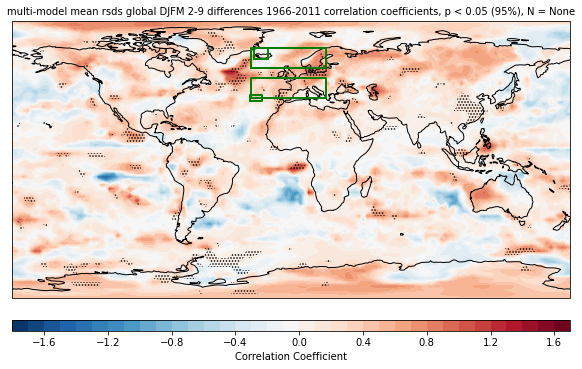

In [9]:
# Now plot the correlations for the rsds data
# rsds, year 2-9, DJFM, global
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [11]:
# Now for the next season
model_season = "MAY"
season = "MAM"

In [12]:
# Process the observations for the rsds run
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

# Load the historical data for rsds
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

# Load the dcppA-hindcast data for rsds
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                model_season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/BCC-CSM2-MR/global/years_2-9/MAM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/MPI-ESM1-2-HR/global/years_2-9/MAM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/CanESM5/global/years_2-9/MAM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1


loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loading variant_label:  r1i1p1f1
loading variant_label:  r1i1p2f1
loading variant_label:  r20i1p1f1
loading variant_label:  r21i1p1f1
loading variant_label:  r22i1p1f1
loading variant_label:  r23i1p1f1
loading variant_label:  r24i1p1f1
loading variant_label:  r25i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r2i1p2f1
loading variant_label:  r3i1p1f1
loading variant_label:  r3i1p2f1
loading variant_label:  r4i1p1f1
loading variant_label:  r4i1p2f1
loading variant_label:  r5i1p1f1
loading variant_label:  r5i1p2f1
loading variant_label:  r6i1p1f1
loading variant_label:  r6i1p2f1
loading variant_label:  r7i1p1f1
loading variant_label:  r7i1p2f1
loading variant_label:  r8i1p1f1
loading variant_label:  r8i1p2f1
loading variant_label:  r9i1p1f1
loading variant_label:  r9i1p2f1
processing model:  CMCC-CM2-SR5


In [13]:
# Calculate the bootstrapped p-values for the rsds data
# Only 10 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data,
                                                                    dcpp_models, historical_models,
                                                                        variable='rsds', n_bootstraps=10)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006

In [14]:
# Now calcualte the differences in spatial correlations
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (146, 54, 72, 144)
shape of observed data (54, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members

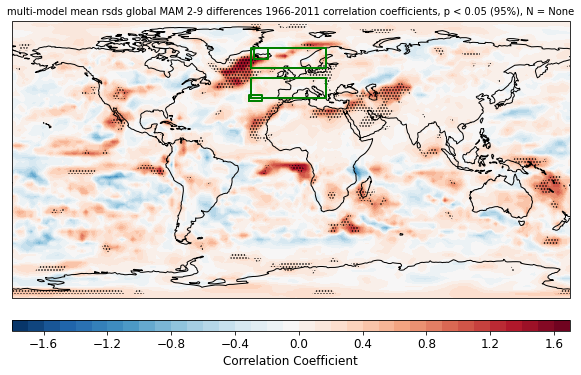

In [15]:
# Now plot the correlations for the rsds data
# rsds, year 2-9, DJFM, global
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [4]:
# NOw for the next season
season = "JJA"
model_season = "ULG"

In [5]:
# Process the observations for the rsds run
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

# Load the historical data for rsds
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

# Load the dcppA-hindcast data for rsds
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                model_season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/BCC-CSM2-MR/global/years_2-9/JJA/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/MPI-ESM1-2-HR/global/years_2-9/JJA/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/CanESM5/global/years_2-9/JJA/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1

In [ ]:
# Calculate the bootstrapped p-values for the rsds data
# Only 10 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data,
                                                                    dcpp_models, historical_models,
                                                                        variable='rsds', n_bootstraps=10)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006

: 

In [19]:
# Now calcualte the differences in spatial correlations
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (146, 54, 72, 144)
shape of observed data (54, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation coefficients range from nan to nan
P-values range from nan to nan
shape of pfield (72, 144)
observed data shape (45, 72, 144)
model data shape (45, 72, 144)
Correlation coefficients range from nan to nan
P-values range from nan to nan
shape of pfield (72, 144)
rfield_init shape (72, 144)
rfield_uninit shape (72, 144)
rfield_diff type <class 'numpy.ndarray'>
sign_regions type <class 'numpy.ndarray'>
rfield_diff shape (72, 144)
sign_regions shape (72, 144)


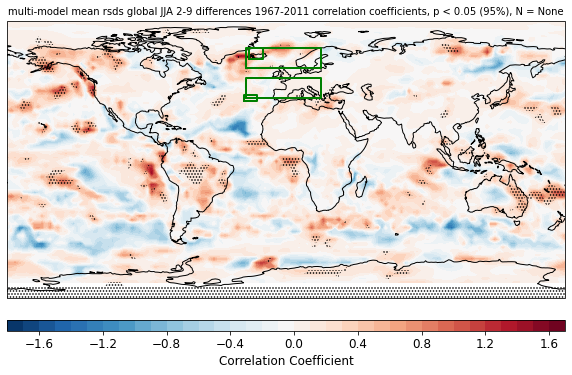

In [20]:
# Now plot the correlations for the rsds data
# rsds, year 2-9, DJFM, global
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [10]:
# NOw for the next season
season = "SON"

In [11]:
# Process the observations for the rsds run
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

# Load the historical data for rsds
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

# Load the dcppA-hindcast data for rsds
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/BCC-CSM2-MR/global/years_2-9/SON/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/MPI-ESM1-2-HR/global/years_2-9/SON/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/CanESM5/global/years_2-9/SON/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1

In [12]:
# Calculate the bootstrapped p-values for the rsds data
# Only 10 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data,
                                                                    dcpp_models, historical_models,
                                                                        variable='rsds', n_bootstraps=10)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2020 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
dcpp years list [1967 1968 1969 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007

In [13]:
# Now calcualte the differences in spatial correlations
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
duplicate years
not including this member for this model:  MIROC6
duplicate years
not including this member for this model:  MIROC6
duplicate years
not including this member for this model:  MIROC6
duplicate years
not including this member for this model:  MIROC6
duplicate years
not including this member for this model:  MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (141, 53, 72, 144)
shape of observed data (53, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extr

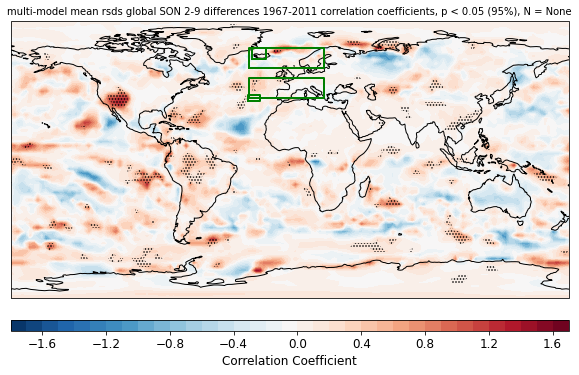

In [14]:
# Now plot the correlations for the rsds data
# rsds, year 2-9, DJFM, global
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [11]:
# Set up the variables for the tas runs
variable = 'tas'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'tas'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
historical_models = dic.tas_models_noEC
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models_noEC

In [12]:
# process the tas observations
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [13]:
# Load and process the historical data and dcpp data for tas
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

# Load the dcppA-hindcast data for tas
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
loading variant_label:  r4i1p1f1
loading variant_label:  r5i1p1f1
loading variant_label:  r6i1p1f1
loading variant_label:  r7i1p1f1
loading variant_label:  r8i1p1f1
loading variant_label:  r9i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_l

In [14]:
# Calculate the bootstrapped p-values for the tas data
# Only 10 bootstraps for our testcase
pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data,
                                                                    dcpp_models, historical_models,
                                                                        variable='tas', n_bootstraps=10)

1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2020 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1984 1985 1986 1987 1988 1989 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
historical years list [1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 199

In [15]:
# Now calcualte the differences in spatial correlations
rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
    dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
        historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
                                                                                        dcpp_models, historical_models,
                                                                                            variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (147, 52, 72, 144)
shape of observed data (52, 72, 144)
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (177, 48, 72, 144)
shape of obser

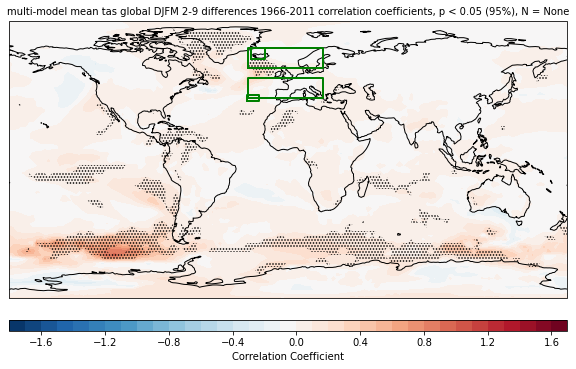

In [16]:
# Now plot the correlations for the rsds data
# rsds, year 2-9, DJFM, global
plt_fnc.plot_correlations(dic.models, rfield_diff, pfield_diff_bs, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

In [18]:
# TODO: plot the spatial correlation differences for each model
# Count how many values are less than 0.05 test
total_values = np.size(pfield_diff_bs)
below_threshold = np.count_nonzero(pfield_diff_bs < 0.05)

# Calculate the percentage
percentage = below_threshold / total_values * 100

# Print the percentage
print(percentage)

print(total_values)
print(below_threshold)

11.54513888888889
10368
1197


Processing season: DJFM
Processing season: DJFM
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant

loading variant_label:  r9i1p2f1
processing model:  CMCC-CM2-SR5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CMCC-CM2-SR5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  HadGEM3-GC31-MM
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/HadGEM3-GC31-MM/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f3
loading variant_label:  r2i1p1f3
loading variant_label:  r3i1p1f3
loading variant_label:  r4i1p1f3
processing model:  MPI-ESM1-2-LR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-LR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  FGOALS-f3-L
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/FGOALS-f3-L/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  MIROC6
files_path:  /home/users/benhutch/skill-maps

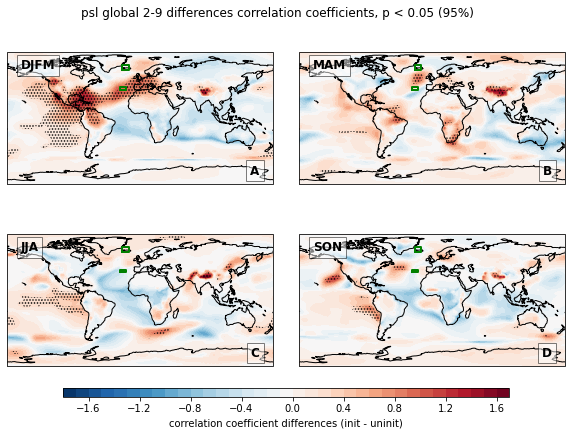

In [3]:
# TODO: Test the new function plotting the differences for the different seasons
# only 50 bootstraps for our testcase
plt_fnc.plot_seasonal_correlations_diff(observations_path, historical_models, dcpp_models,
                                        variable, region, region_grid, forecast_range,
                                        seasons_list_obs=dic.seasons_list_obs, seasons_list_mod=dic.seasons_list_model,
                                        plots_dir=dic.plots_dir, obs_var_name='psl', azores_grid=dic.azores_grid, 
                                        iceland_grid=dic.iceland_grid, p_sig=0.05,
                                        experiment='differences', n_bootstraps=1000)



In [17]:
# Now for rsds
# Set up the variables
# Set up the parameters for the run
variable = 'rsds'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'rsds'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# exclude EC-Earth3 as time period not long enough
historical_models = dic.rsds_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models_noCMCC

Processing season: DJFM
Processing season: DJFM
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/rsds/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading vari

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation coefficients range from nan to nan
P-values range from nan to nan
shape of pfield (72, 144)
observed data shape (45, 72, 144)
model data shape (45, 72, 144)
Correlation coefficients range from nan to nan
P-values range from nan to nan
shape of pfield (72, 144)
rfield_init shape (72, 144)
rfield_uninit shape (72, 144)
rfield_diff type <class 'numpy.ndarray'>
sign_regions type <class 'numpy.ndarray'>
rfield_diff shape (72, 144)
sign_regions shape (72, 144)
1959 contains NaN values
removing this year from the observed data
1960 contains NaN values
removing this year from the observed data
1961 contains NaN values
removing this year from the observed data
1962 contains NaN values
removing this year from the observed data
2021 contains NaN values
removing this year from the observed data
2022 contains NaN values
removing this year from the observed data
2023 contains NaN values
removing this year from the observed data
dcpp years list [1967 1968 1969 1970 1971 1972 1973 1974 197

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


bootstrap number 1
block indices shape (45,)
block indices [5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 40, 41, 42, 43, 44, 40, 41, 42, 43, 44, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 40, 41, 42, 43, 44, 30, 31, 32, 33, 34]
bootstrap number 2
block indices shape (45,)
block indices [40, 41, 42, 43, 44, 5, 6, 7, 8, 9, 15, 16, 17, 18, 19, 30, 31, 32, 33, 34, 0, 1, 2, 3, 4, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 15, 16, 17, 18, 19, 15, 16, 17, 18, 19]
bootstrap number 3
block indices shape (45,)
block indices [20, 21, 22, 23, 24, 10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 5, 6, 7, 8, 9, 35, 36, 37, 38, 39, 5, 6, 7, 8, 9]
bootstrap number 4
block indices shape (45,)
block indices [15, 16, 17, 18, 19, 40, 41, 42, 43, 44, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 40, 41, 42, 43, 44, 35, 36, 37, 38, 39, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 15, 16, 17, 18, 19]
bootstrap number 5
block indices shape (45,)
block indices [35, 36, 37, 38, 39, 10, 11, 12, 13, 14, 35, 3

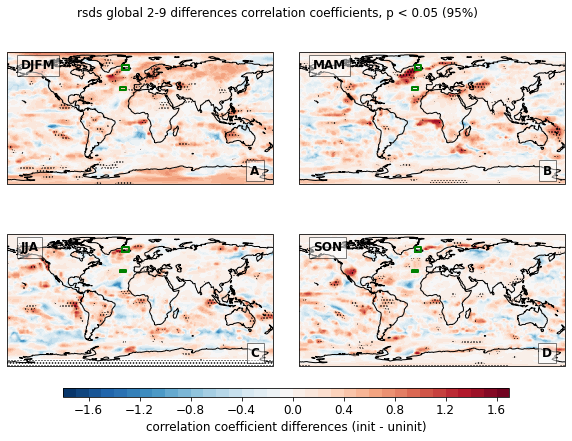

In [18]:
# Test the RSDS case
# 10 bootstrap for speed of processing
plt_fnc.plot_seasonal_correlations_diff(observations_path, historical_models, dcpp_models,
                                            variable, region, region_grid, forecast_range,
                                                seasons_list_obs=dic.seasons_list_obs, seasons_list_mod=dic.seasons_list_model,
                                                    plots_dir=dic.plots_dir, obs_var_name='rsds', azores_grid=dic.azores_grid, 
                                                        iceland_grid=dic.iceland_grid, p_sig=0.05,
                                                            experiment='differences', n_bootstraps=10)

In [19]:
# Now set up the variables for the tas runs
variable = 'tas'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'tas'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# NOTE: EC-Earth3 is excluded as time period not long enough (1974-2010 ish)
historical_models = dic.tas_models_noEC
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models_noEC

Processing season: DJFM
Processing season: DJFM
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
loading variant_label:  r4i1p1f1
loading variant_label:  r5i1p1f1
loading variant_label:  r6i1p1f1
loading variant_label:  r7i1p1f1
loading variant_label:  r8i1p1f1
loading variant_label:  r9i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/tas/CanESM5/

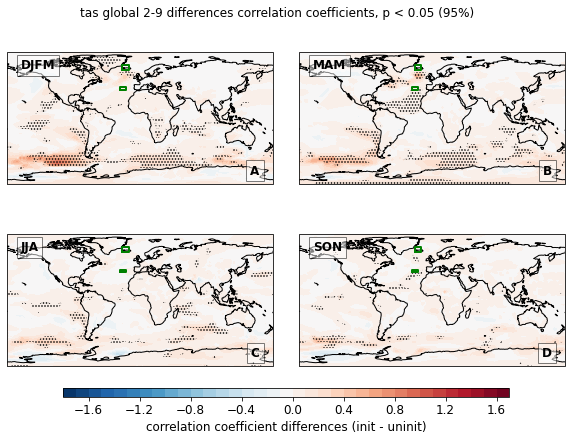

In [20]:
# test the tas case
# 10 bootstrap for speed of processing
plt_fnc.plot_seasonal_correlations_diff(observations_path, historical_models, dcpp_models,
                                            variable, region, region_grid, forecast_range,
                                                seasons_list_obs=dic.seasons_list_obs, seasons_list_mod=dic.seasons_list_model,
                                                    plots_dir=dic.plots_dir, obs_var_name='tas', azores_grid=dic.azores_grid,
                                                        iceland_grid=dic.iceland_grid, p_sig=0.05,
                                                            experiment='differences', n_bootstraps=10)

In [3]:
# Now for sfcwind
# Set up the variables
# Set up the parameters for the run
variable = 'sfcWind'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'sfcWind'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
historical_models = dic.sfcWind_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.sfcWind_models_dcpp


Processing season: DJFM
Processing season: DJFM
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/sfcWind/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/sfcWind/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/sfcWind/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CMCC-CM2-SR5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/sfcWind/CMCC-CM2-SR5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
proces

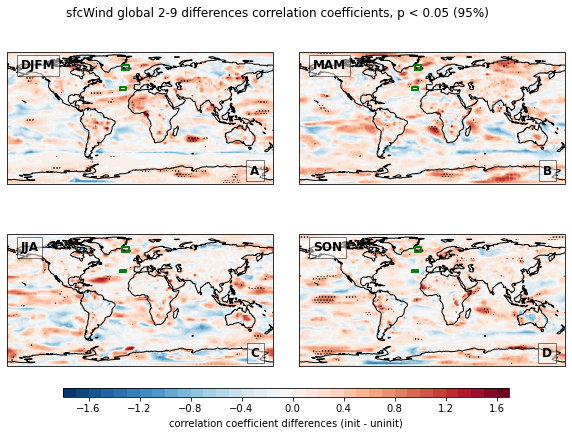

In [4]:
# Test the sfcWind case
# 10 bootstrap for speed of processing
plt_fnc.plot_seasonal_correlations_diff(observations_path, historical_models, dcpp_models,
                                            variable, region, region_grid, forecast_range,
                                                seasons_list_obs=dic.seasons_list_obs, seasons_list_mod=dic.seasons_list_model,
                                                    plots_dir=dic.plots_dir, obs_var_name='sfcWind', azores_grid=dic.azores_grid,
                                                        iceland_grid=dic.iceland_grid, p_sig=0.05,
                                                            experiment='differences', n_bootstraps=10)

In [2]:
# NOw set up the variables for the 850 wind runs
variable = 'wind'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs_ua_va
obs_var_name = 'wind'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
historical_models = dic.historical_models_ua_va
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.common_models


In [4]:
# Test the 850 wind case
# 10 bootstrap for speed of processing
# FIXME: Not sure why historical ua va not loadinf correctly
# 3 for one
# 6 for the other
plt_fnc.plot_seasonal_correlations_diff(observations_path, historical_models, dcpp_models,
                                            variable, region, region_grid, forecast_range,
                                                seasons_list_obs=dic.seasons_list_obs, seasons_list_mod=dic.seasons_list_model,
                                                    plots_dir=dic.plots_dir, obs_var_name='wind', azores_grid=dic.azores_grid,  
                                                        iceland_grid=dic.iceland_grid, p_sig=0.05,
                                                            experiment='differences', n_bootstraps=10)

Processing season: DJFM
Processing season: DJFM
Calculating the wind speed from the u and v components
Variable is ua or va, creating new file name
File already exists
Loading ERA5 data


Forecast range: 2 - 9
Rolling mean range: 8
Variable is ua or va, creating new file name
File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8
processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  CMCC-CM2-SR5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/CMCC-CM2-SR5/global/years_2-9/DJFM/outputs/processed/*.nc
processing model:  HadGEM3-GC31-MM
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/ua/HadGEM3-GC31-MM/global/years_2-9/DJFM/outputs/processed/*.nc
processing mo

IndexError: list index out of range